In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6) 
sns.set_theme(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')

In [56]:
#load data
cvd_data = pd.read_csv('data/cardio_data.csv', delimiter=';')

In [57]:
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
cont_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

In [58]:
#clean data
cvd_data.age = cvd_data.age // 365
cvd_data.gender = cvd_data.gender.replace({1:0, 2:1})

cvd_data = cvd_data[(cvd_data['ap_hi'] > 50) & (cvd_data['ap_hi'] < 250) &
        (cvd_data['ap_lo'] > 30) & (cvd_data['ap_lo'] < 180) &
        (cvd_data['ap_hi'] > cvd_data['ap_lo'])]

In [59]:
print("=== Dataset Info ===")
cvd_data.info()

print("=== Summary Statistics ===")
display(cvd_data.describe())

print("=== Unique Value Counts ===")
display(cvd_data.nunique())

print("=== Head ===")
display(cvd_data.head())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 68670 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68670 non-null  int64  
 1   age          68670 non-null  int64  
 2   gender       68670 non-null  int64  
 3   height       68670 non-null  int64  
 4   weight       68670 non-null  float64
 5   ap_hi        68670 non-null  int64  
 6   ap_lo        68670 non-null  int64  
 7   cholesterol  68670 non-null  int64  
 8   gluc         68670 non-null  int64  
 9   smoke        68670 non-null  int64  
 10  alco         68670 non-null  int64  
 11  active       68670 non-null  int64  
 12  cardio       68670 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.3 MB
=== Summary Statistics ===


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000,68670.000000
mean,49975.573671,52.828688,0.348624,164.360929,74.118036,126.672055,81.304471,1.364657,1.225717,0.087971,0.053357,0.803364,0.494699
std,28845.523479,6.769274,0.476538,8.183764,14.331639,16.690660,9.439624,0.678897,0.571592,0.283255,0.224745,0.397458,0.499976
min,0.000000,29.000000,0.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25002.250000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50011.000000,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74869.750000,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,1.000000,250.000000,200.000000,240.000000,170.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


=== Unique Value Counts ===


id             68670
age               28
gender             2
height           106
weight           281
ap_hi            107
ap_lo             80
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

=== Head ===


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,4,47,0,156,56.0,100,60,1,1,0,0,0,0


Univariate EDA

'Histogram of age'

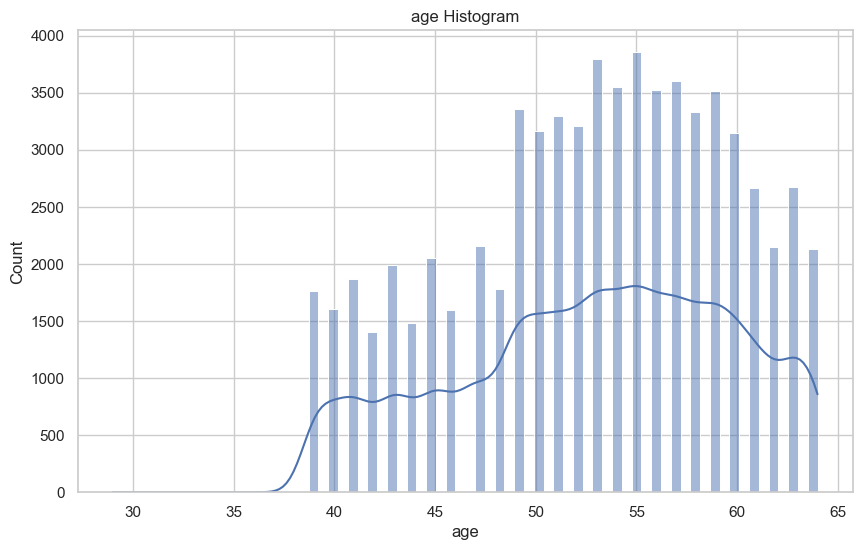

'Boxplot of age'

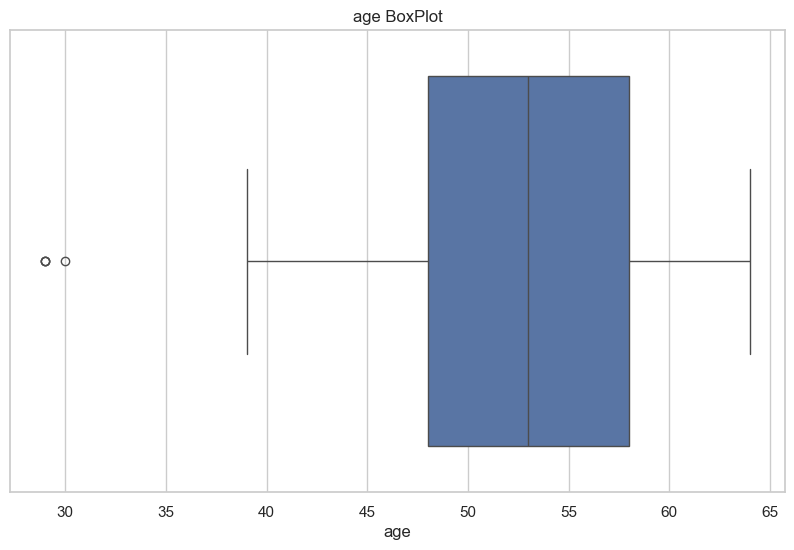

'Histogram of height'

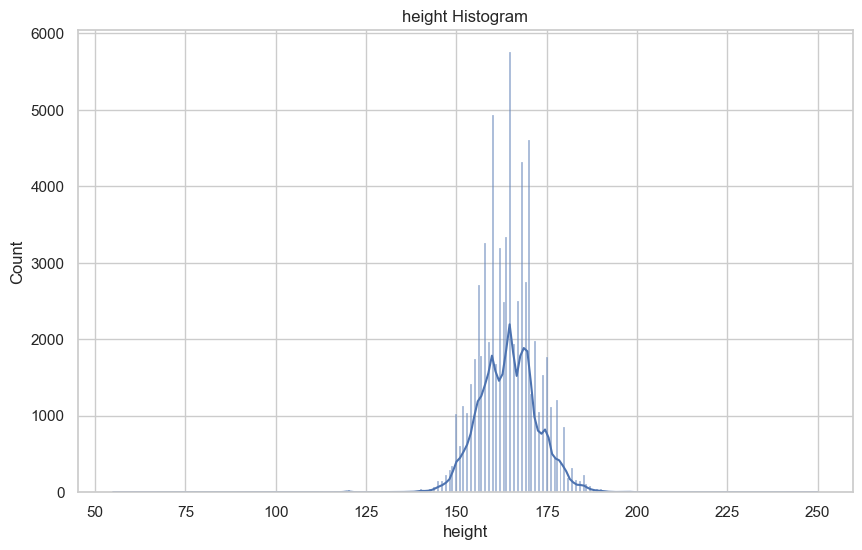

'Boxplot of height'

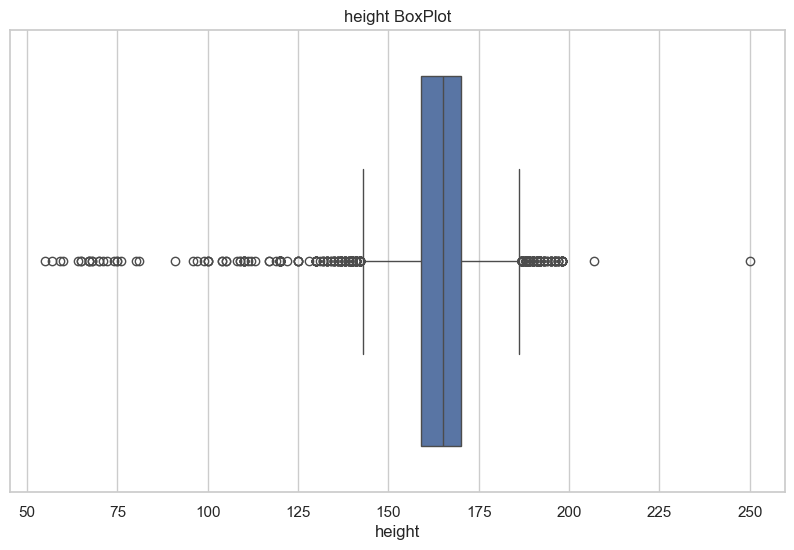

'Histogram of weight'

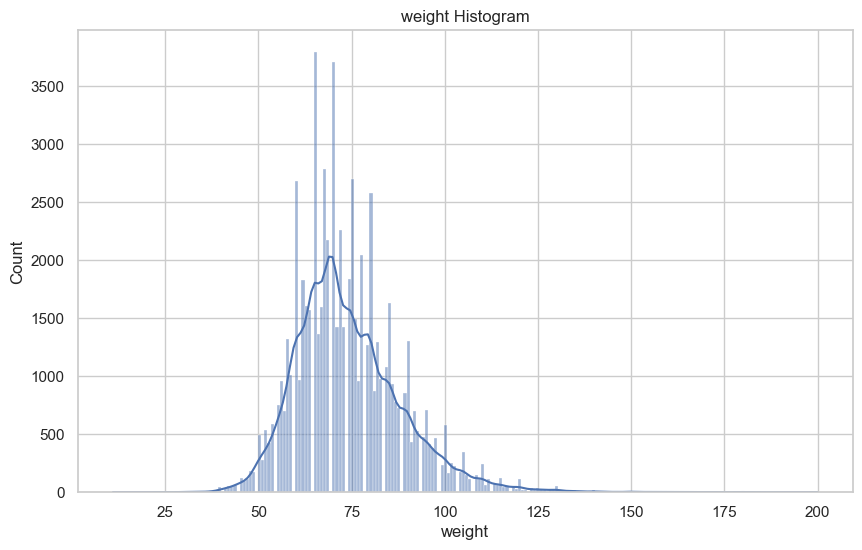

'Boxplot of weight'

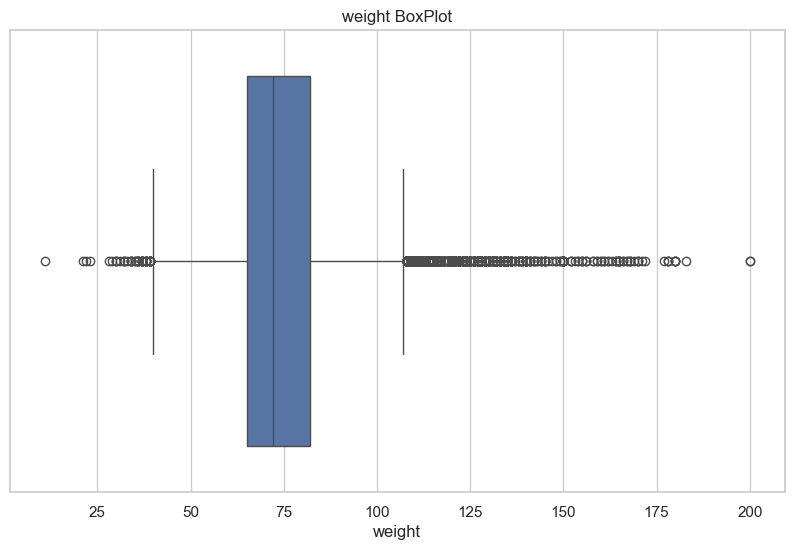

'Histogram of ap_hi'

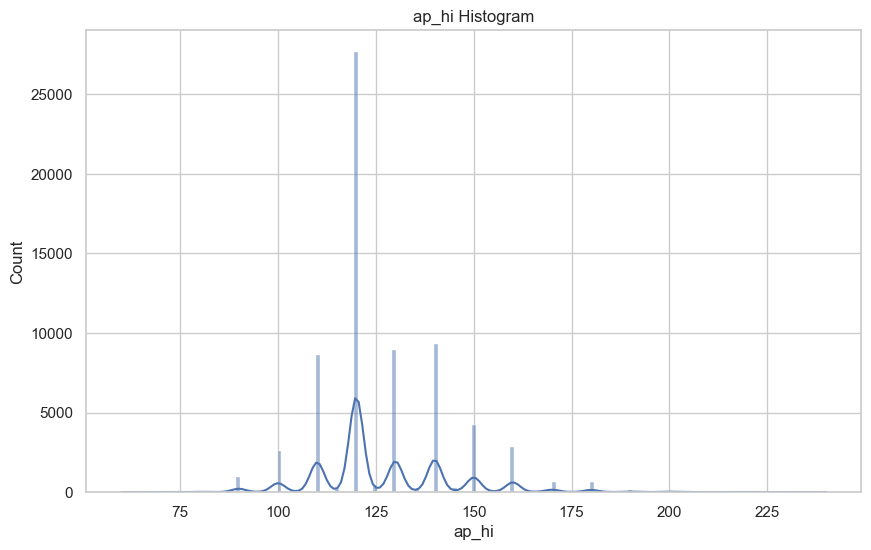

'Boxplot of ap_hi'

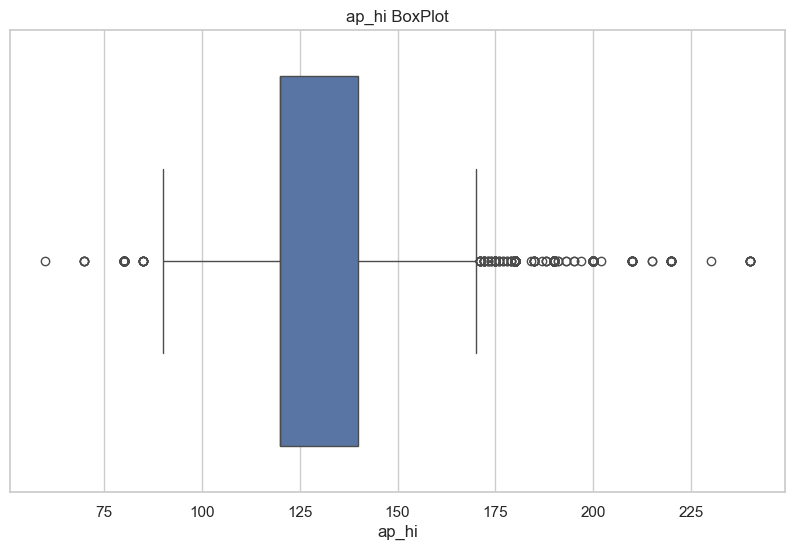

'Histogram of ap_lo'

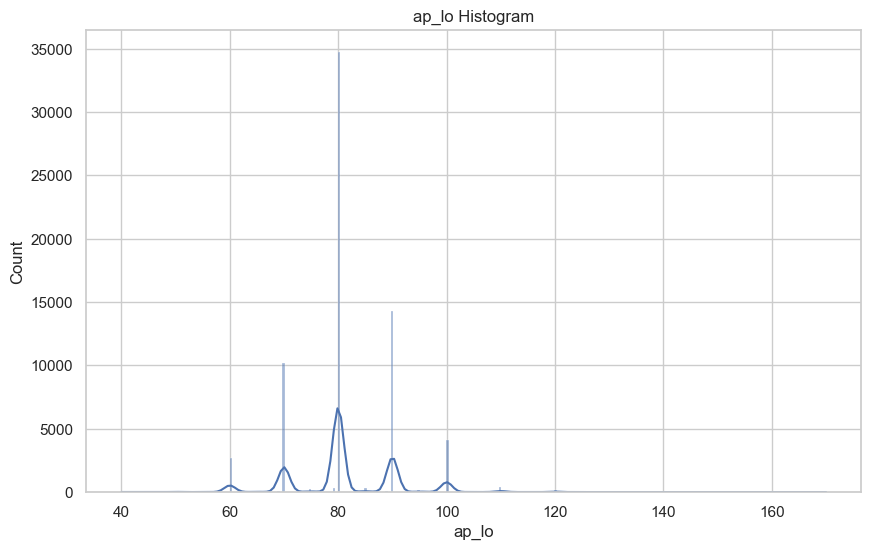

'Boxplot of ap_lo'

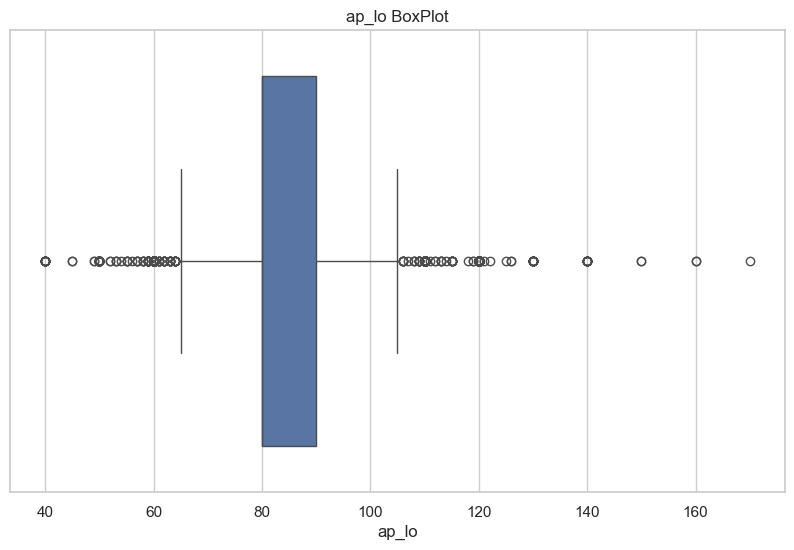

In [60]:
#hist and bosplot for continuous features
for col in cont_cols:
    display(f"Histogram of {col}")
    sns.histplot(data=cvd_data, x = col, kde = True)
    plt.title(f'{col} Histogram')
    plt.show()

    display(f"Boxplot of {col}")
    sns.boxplot(data=cvd_data, x = col)
    plt.title(f'{col} BoxPlot')
    plt.show()

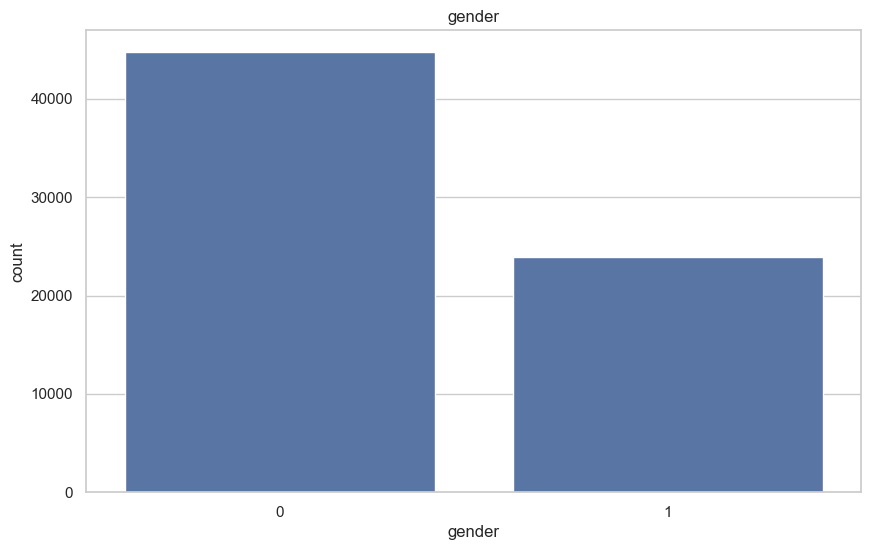

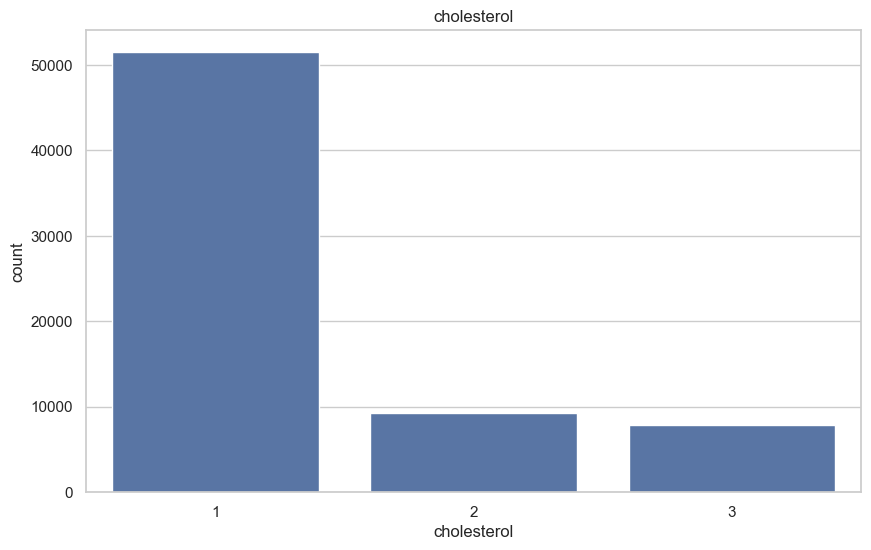

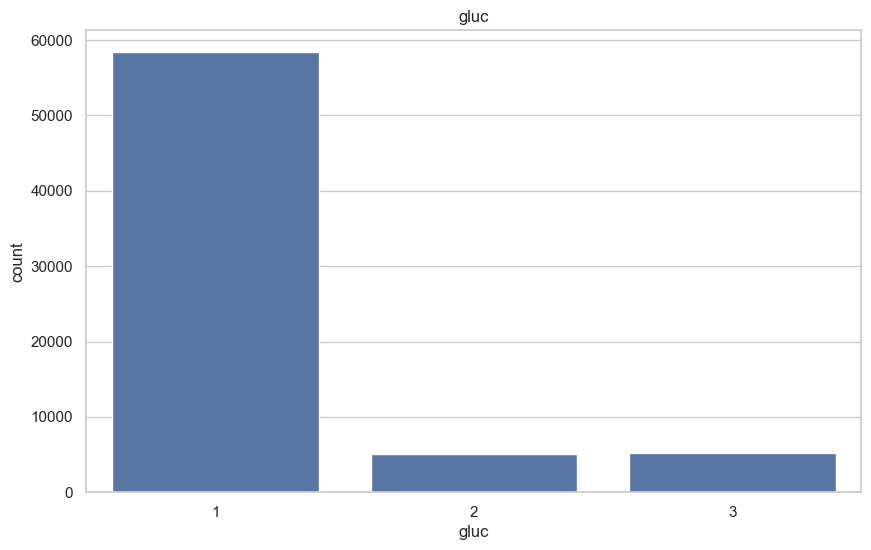

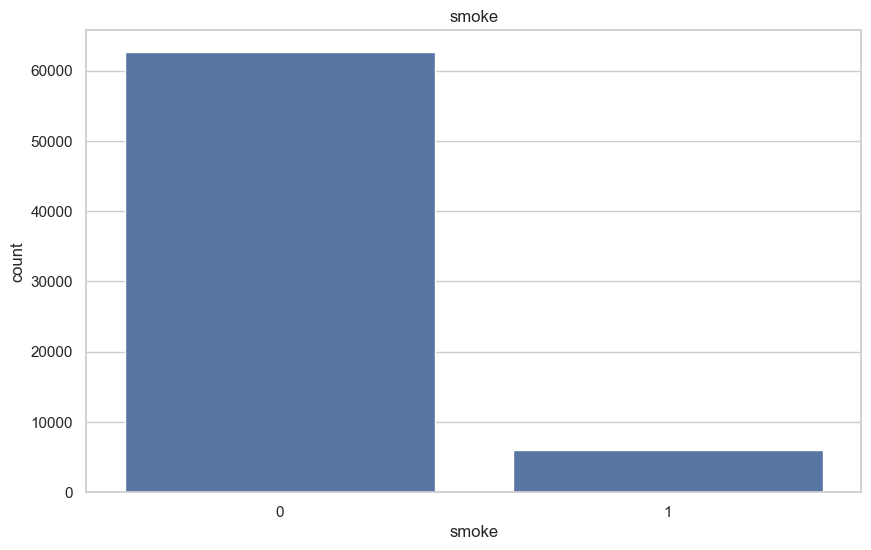

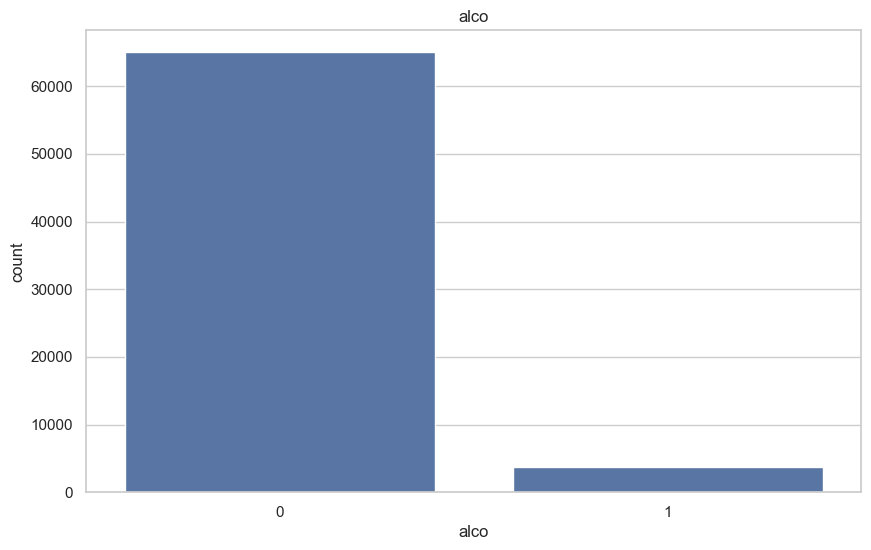

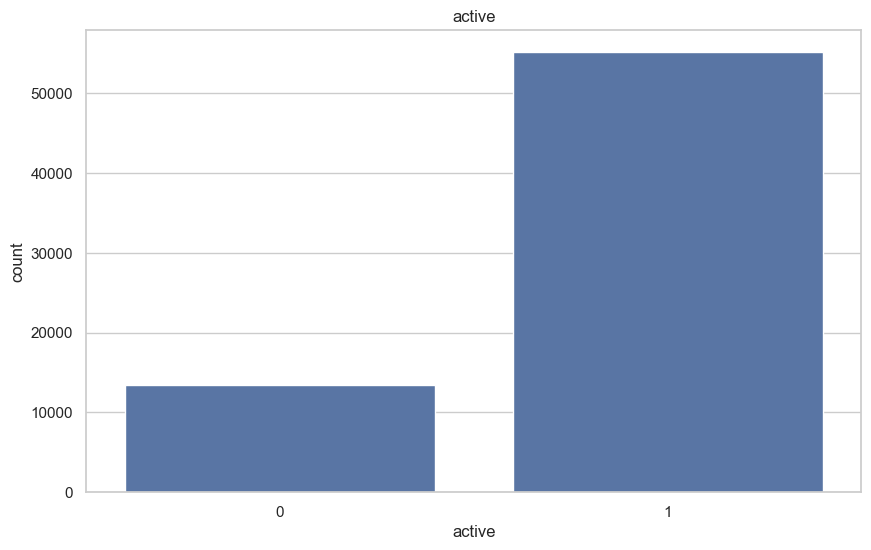

In [61]:
#Countplot of categorical features
for col in cat_cols:
    sns.countplot(data = cvd_data, x = col)
    plt.title(f"{col}")
    plt.show()

Bivariate EDA

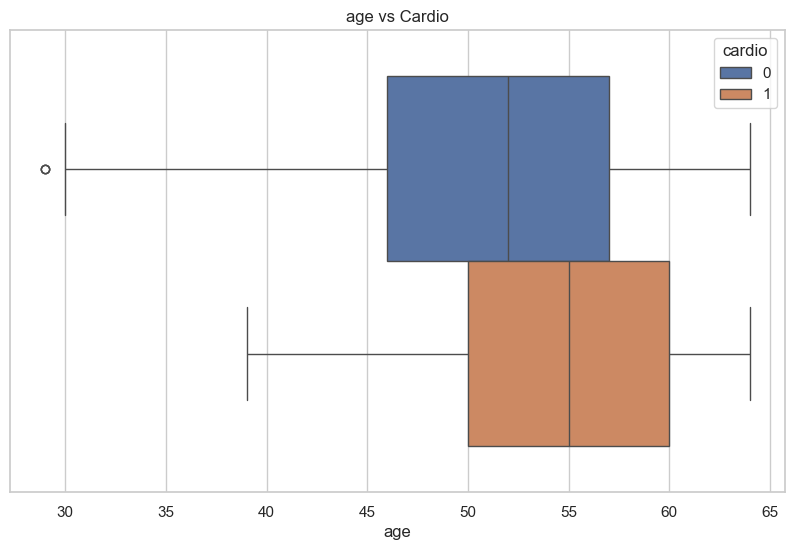

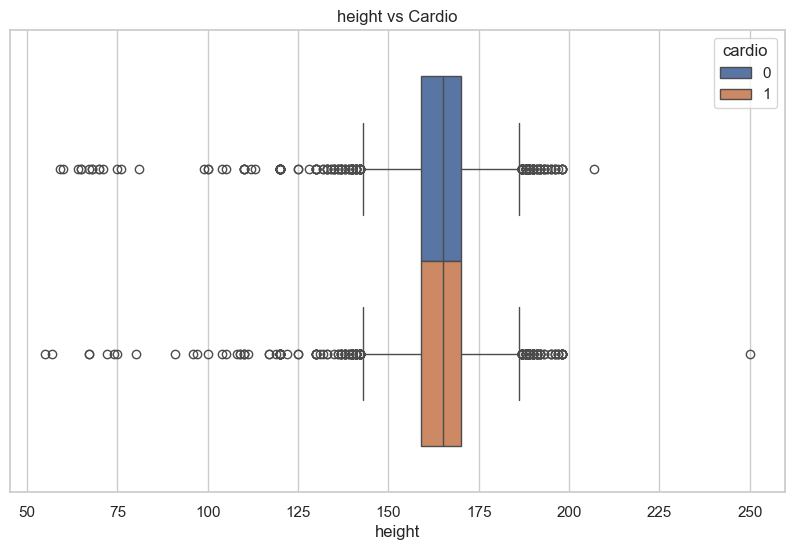

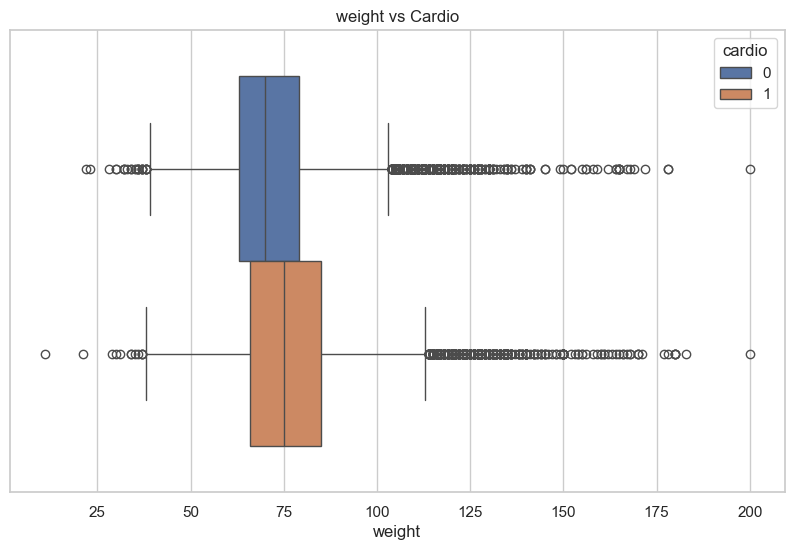

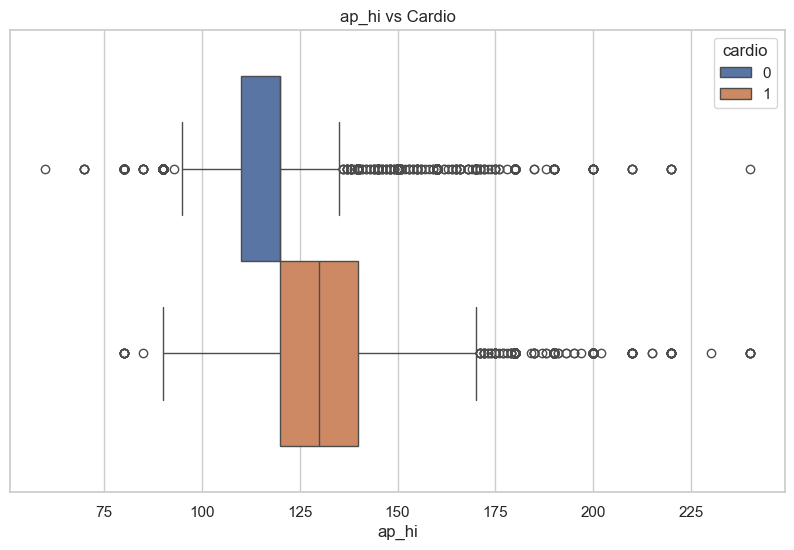

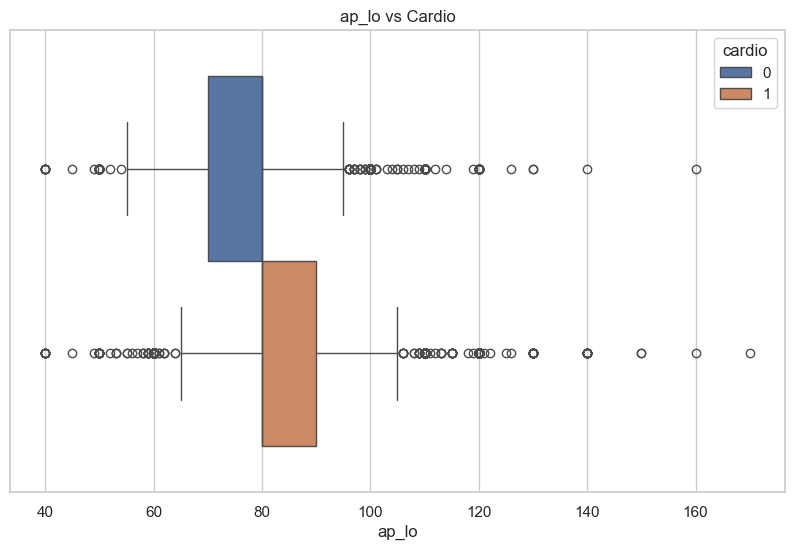

In [62]:
#relation between continuous features and cardio
for col in cont_cols:
    sns.boxplot(data = cvd_data, x = col, hue = 'cardio')
    plt.title(f"{col} vs Cardio")
    plt.show()

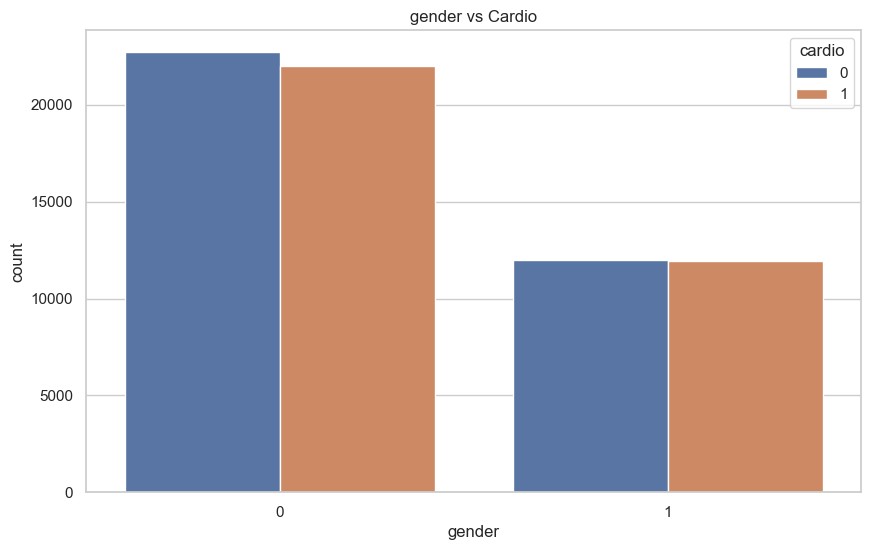

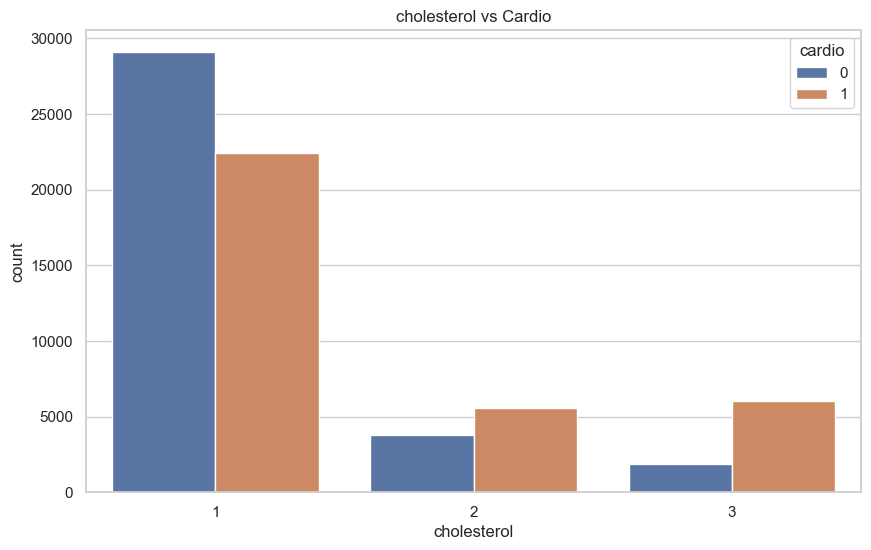

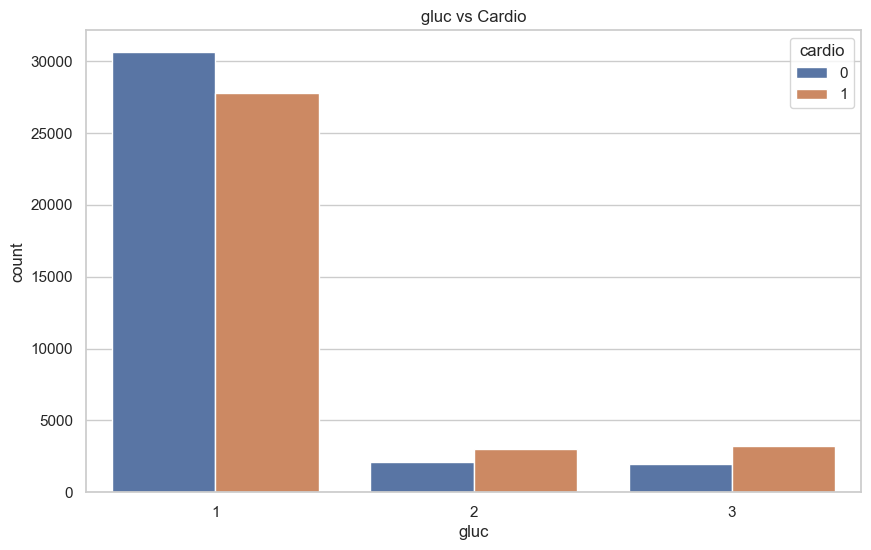

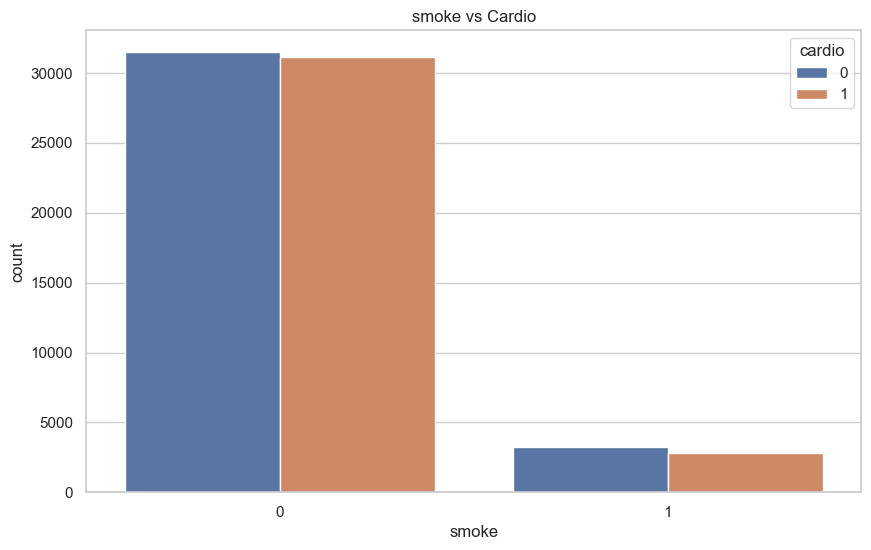

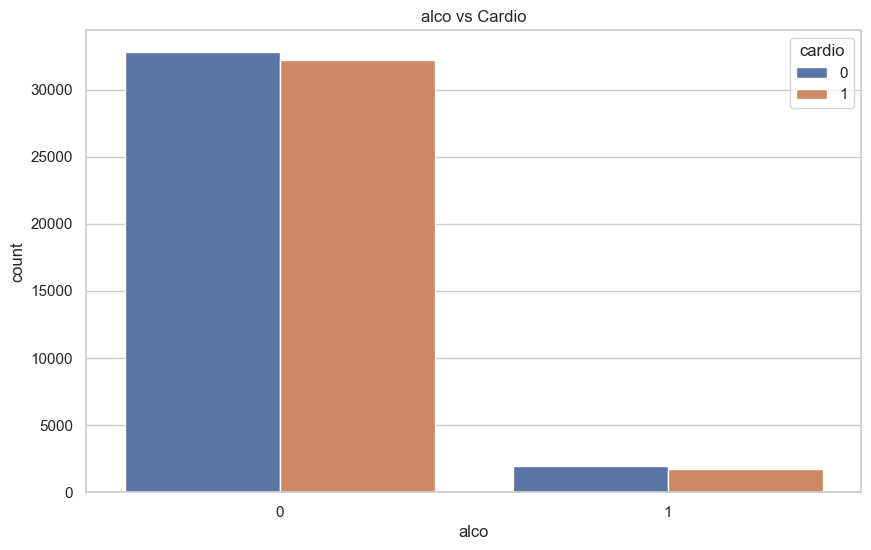

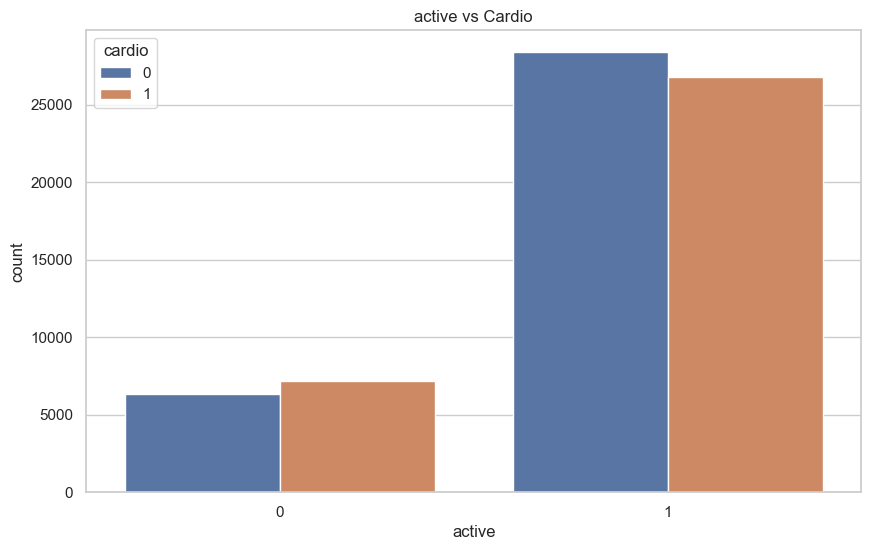

In [63]:
#relation between categorical features and cardio
for col in cat_cols:
    sns.countplot(data = cvd_data, x = col, hue = 'cardio')
    plt.title(f"{col} vs Cardio")
    plt.show()

<Axes: xlabel='cardio', ylabel='count'>

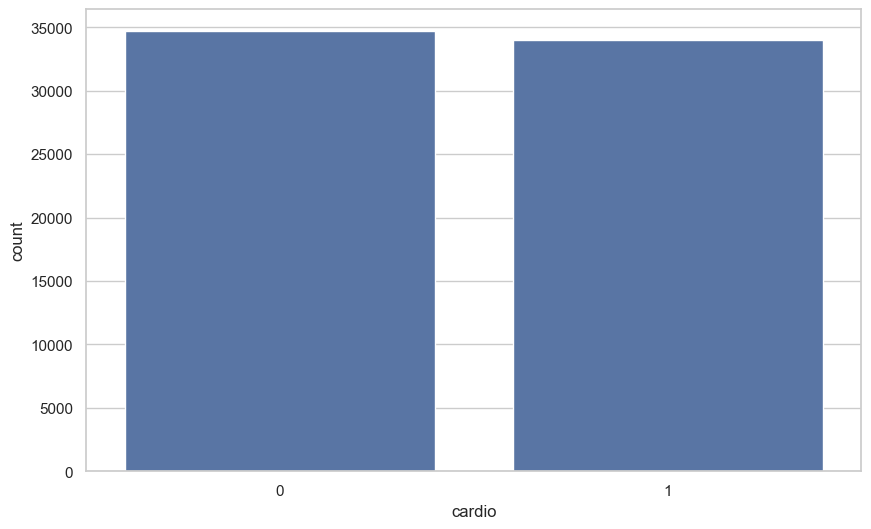

In [64]:
#Target Feature Distribution
sns.countplot(data=cvd_data,x='cardio')

Multivarient EDA

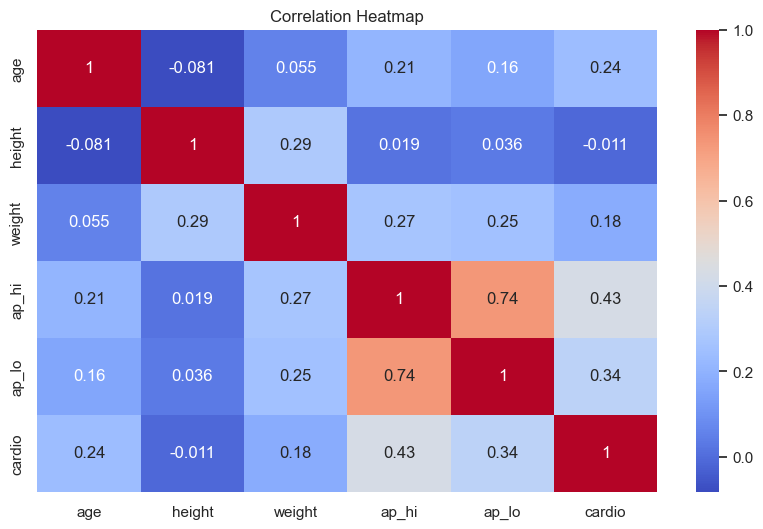

In [65]:
#Correlation Heatmap
cols = [*cont_cols, 'cardio']
sns.heatmap(cvd_data[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

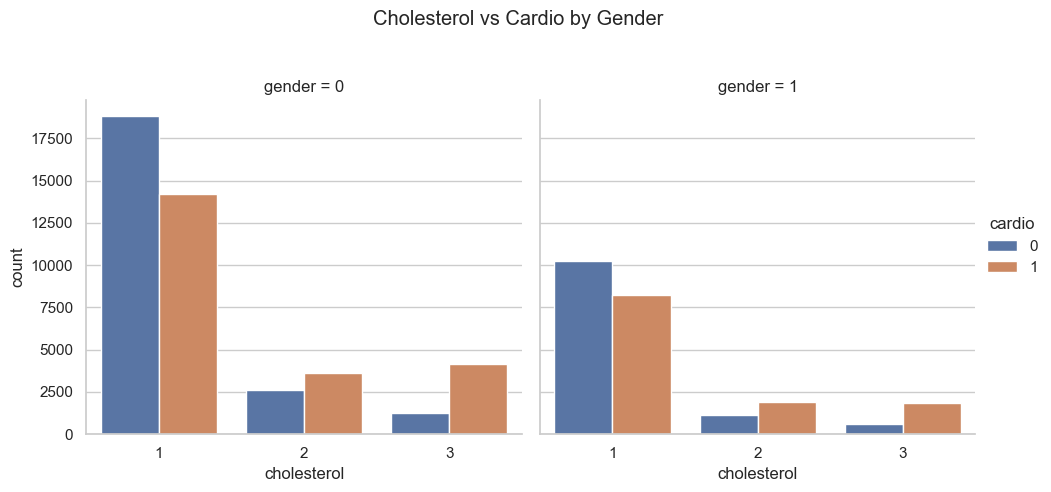

In [66]:
sns.catplot(x='cholesterol', hue='cardio', col='gender', data=cvd_data, kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Cholesterol vs Cardio by Gender')
plt.show()

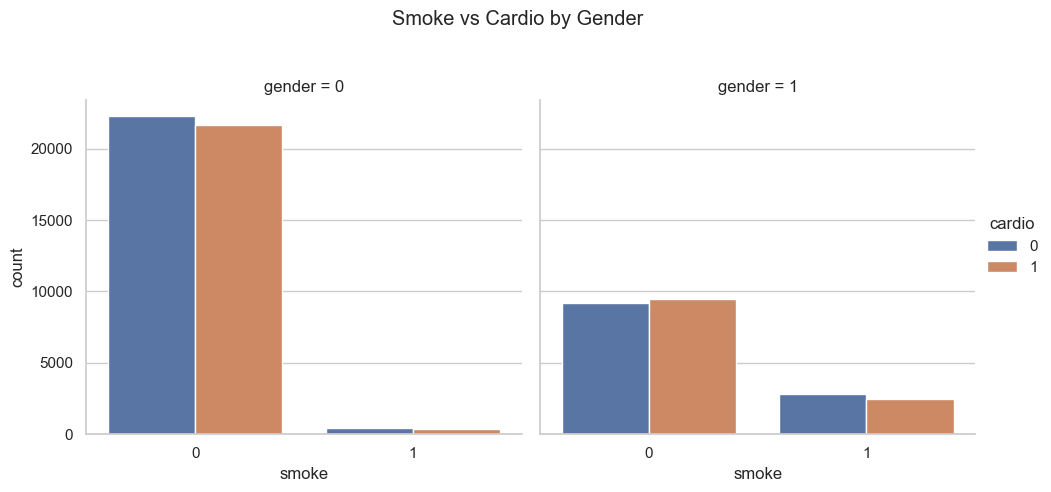

In [67]:
sns.catplot(x='smoke', hue='cardio', col='gender', data=cvd_data, kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Smoke vs Cardio by Gender')
plt.show()

<Axes: xlabel='alco', ylabel='smoke'>

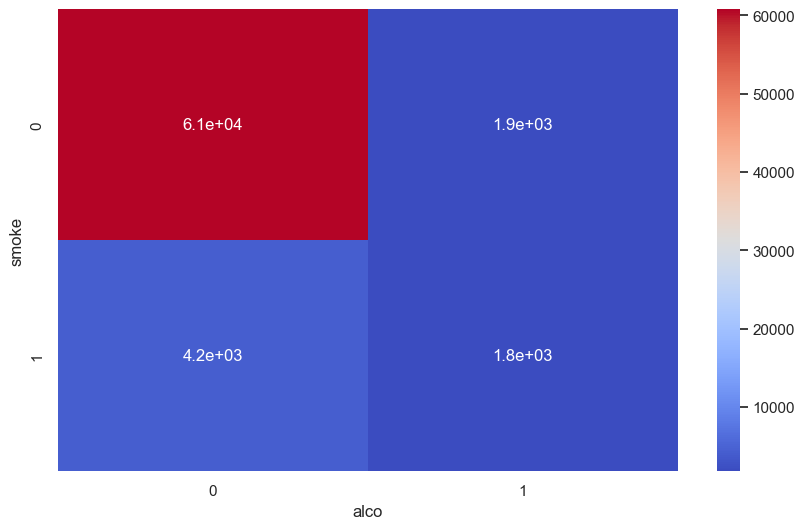

In [68]:
sns.heatmap(pd.crosstab(cvd_data['smoke'], cvd_data['alco']), annot=True, cmap='coolwarm')

In [69]:
#split dataset
X = cvd_data.drop(['cardio', 'id'],  axis=1)
y = cvd_data['cardio']

In [70]:
scaler = StandardScaler()
X[cont_cols] = scaler.fit_transform(X[cont_cols])

In [71]:
pd.DataFrame(X[cont_cols]).describe()

,age,height,weight,ap_hi,ap_lo
count,6.867000e+04,6.867000e+04,6.867000e+04,6.867000e+04,6.867000e+04
mean,1.579760e-16,-7.158198e-16,-1.330651e-16,1.523109e-16,-3.155898e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.520150e+00,-1.336325e+01,-4.404136e+00,-3.994602e+00,-4.375680e+00
25%,-7.133295e-01,-6.550736e-01,-6.362218e-01,-3.997507e-01,-1.381920e-01
50%,2.530749e-02,7.809066e-02,-1.477885e-01,-3.997507e-01,-1.381920e-01
75%,7.639445e-01,6.890609e-01,5.499735e-01,7.985329e-01,9.211800e-01
max,1.650309e+00,1.046458e+01,8.783565e+00,6.789951e+00,9.396156e+00


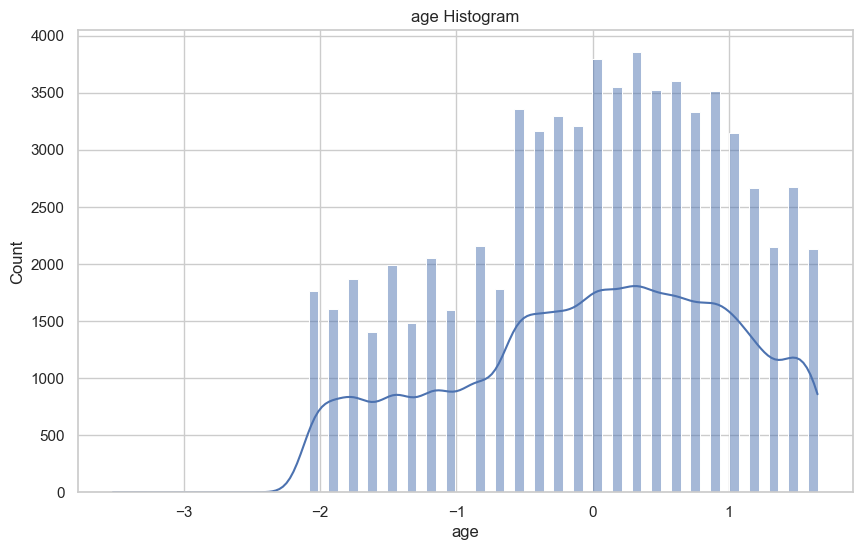

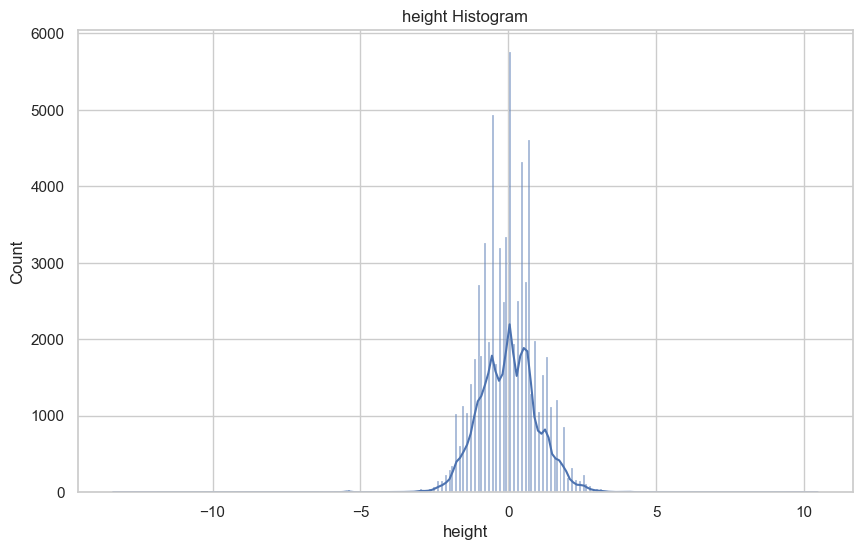

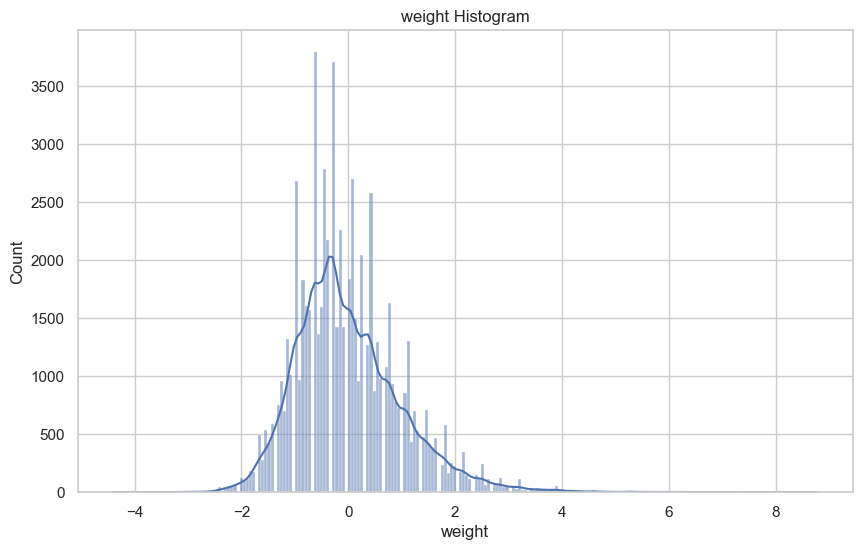

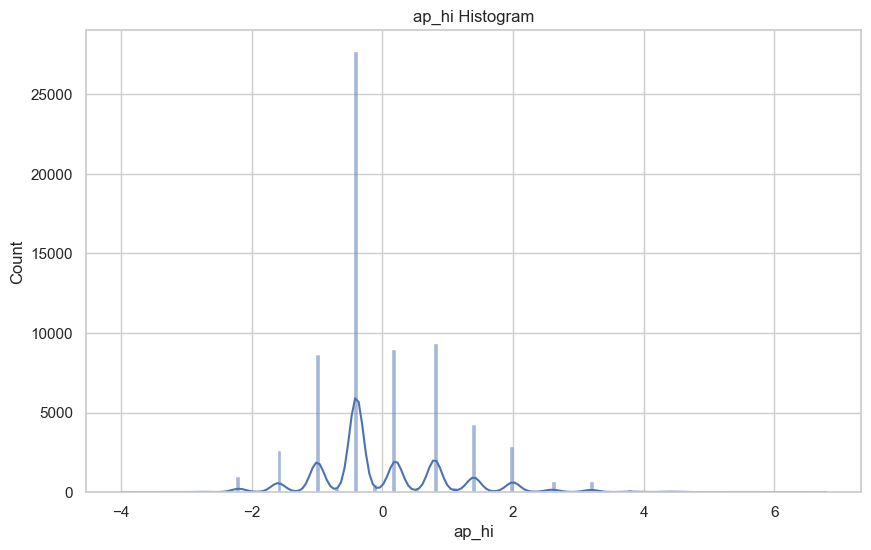

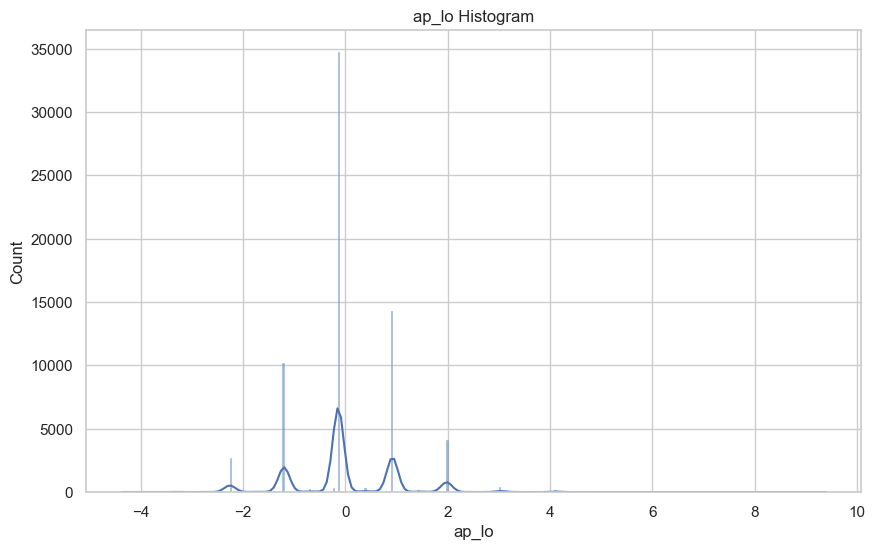

In [72]:
for col in cont_cols:
    sns.histplot(data=X, x = col, kde = True)
    plt.title(f'{col} Histogram')
    plt.show()